# Simulation testing
Testing embedding and fractal dimension code with colored noise and Lorentz attractor.

In [299]:
%load_ext autoreload
%autoreload 2
    
%matplotlib inline
import time
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import odeint

sys.path.append('/Users/rdgao/Documents/code/research/SpaceRecon/')
sys.path.append('/Users/rdgao/Documents/code/research/spectralCV/')
sys.path.append('/Users/rdgao/Documents/code/research/neurodsp/')

import dynamical.nonlinear as nl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
def lorenz(X, t, sigma, beta, rho):
    """The Lorenz equations."""
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp

def sim_lorenz(T, fs, init, args):
    t = np.arange(0,T,1/fs)
    f = odeint(lorenz, init, t, args)
    x, y, z = f.T
    return x,y,z

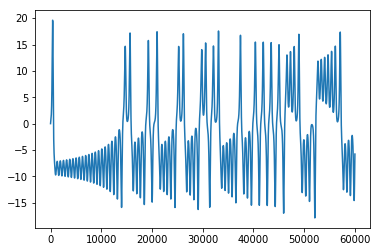

In [180]:
# Lorenz paramters and initial conditions
T,fs = 60,1000
sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 0, 1, 1.05
x,y,z = sim_lorenz(T,fs,init=(u0, v0, w0), args=(sigma, beta, rho))
plt.plot(x)

### Testing my code runtime speed

(157, 0.8851322990337012)


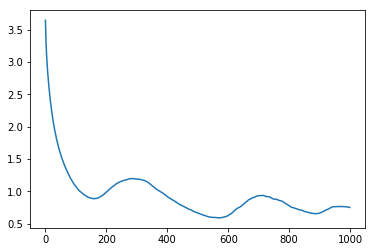

In [300]:
tMI, dMI = nl.delay_MI(x,50,1000)
print(nl.find_valley(dMI))
plt.plot(dMI)

In [302]:
begtime = time.time()
del_R, rel_R = nl.compute_nn_dist(x,nl.find_valley(dMI)[0],5)
endtime = time.time()
endtime-begtime

0.6887240409851074

3
[0.99939205 0.0539897  0.         0.         0.        ]


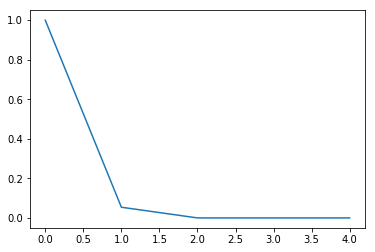

In [303]:
recon_dim, pffn = nl.compute_attractor_dim(del_R,rel_R)
plt.plot(pffn)
print(recon_dim) # but it gets the right answer!
print(pffn)